In [24]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [26]:
import numpy as np 
import pandas as pd

In [27]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [28]:
pip install sys


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sys (from versions: none)
ERROR: No matching distribution found for sys


In [29]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [32]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install IPython


Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [35]:
import sys 
print("Python version: {}". format(sys.version))

import pandas as pd 
print("pandas version: {}". format(pd.__version__))

import matplotlib 
print("matplotlib version: {}". format(matplotlib.__version__))

import seaborn
print("seaborn version: {}". format(seaborn.__version__))

import numpy as np 
print("NumPy version: {}". format(np.__version__))

import IPython
from IPython import display # for pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn 
print("scikit-learn version: {}". format(sklearn.__version__))

import xgboost 
print("xgboost version: {}". format(xgboost.__version__))




Python version: 3.12.0 | packaged by Anaconda, Inc. | (main, Oct  2 2023, 17:20:38) [MSC v.1916 64 bit (AMD64)]
pandas version: 2.3.1
matplotlib version: 3.10.3
seaborn version: 0.13.2
NumPy version: 2.3.1
IPython version: 9.4.0
scikit-learn version: 1.7.0
xgboost version: 3.0.2


In [36]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import time
import random
import itertools

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn import feature_selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Ignore warnings in IPython
import warnings
warnings.filterwarnings('ignore')

Loading the data and basic inference

In [37]:
health_stroke_df = pd.read_csv('healthcare_stroke.csv')
health_stroke_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [38]:
# summarising how many entries are missing
total_entries = len(health_stroke_df)
bmi_number_of_missing = health_stroke_df.bmi.isnull().sum()
smoke_number_of_missing = health_stroke_df.smoking_status.isnull().sum()
bmi_missing_percent = 100*bmi_number_of_missing/total_entries
smoke_missing_percent = 100*smoke_number_of_missing/total_entries

# print the missing value info
print(f"Missing entries details:\n")
print(f"bmi has {bmi_number_of_missing} ({bmi_missing_percent}%) missing values.")
print(f"smoking_status has {smoke_number_of_missing} ({smoke_missing_percent}%) missing values")

Missing entries details:

bmi has 201 (3.9334637964774952%) missing values.
smoking_status has 0 (0.0%) missing values


In [39]:
# Inspecting the first 5 rows of the dataset
health_stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Unique label / value investigation

In [40]:
health_stroke_df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [41]:
# Inspect the likely categorical variables
likely_cat_col = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in likely_cat_col:
    print(f"{col}:", health_stroke_df[col].unique())

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [42]:
# Inspect the likely boolean variables
likely_bool_col = ['hypertension', 'heart_disease', 'stroke']

for col in likely_bool_col:
    print(f"{col}:", health_stroke_df[col].unique())

hypertension: [0 1]
heart_disease: [1 0]
stroke: [1 0]


We therefore conclude that ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] can indeed be treated as categorical variables, whereas ['hypertension', 'heart_disease', 'stroke'] as boolean.

In [43]:
# Summary stats for numerical columns, i.e [age, avg_glucose_level, bmi]
numeric_col = ['age', 'avg_glucose_level', 'bmi']
health_stroke_df[numeric_col].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


Simple checking on aberrant/non-acceptable data inputs

In [44]:
print(f"Number of negative value entries")
for num_var in numeric_col:
    non_neg_check = health_stroke_df[num_var].dropna().apply(lambda x: 0 if x>=0 else 1)
    print(f"{num_var}: {non_neg_check.sum()}")

Number of negative value entries
age: 0
avg_glucose_level: 0
bmi: 0


In [45]:
health_stroke_df[health_stroke_df.work_type=='children'].age.max()

np.float64(16.0)

In [46]:
# Figures inline and set visualisation style
%matplotlib inline
sns.set()

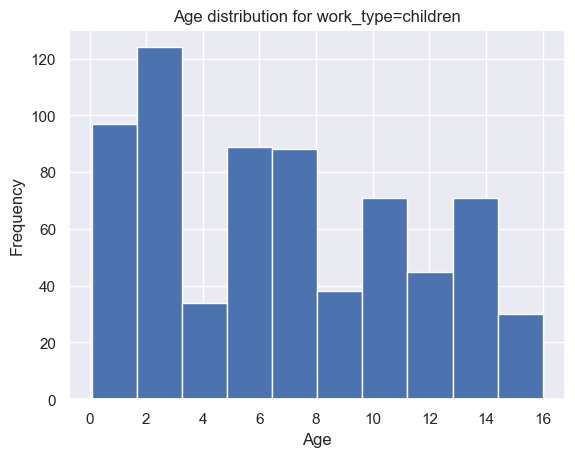

In [47]:
health_stroke_df[health_stroke_df.work_type=='children'].age.plot(kind='hist')
plt.xlabel('Age')
plt.title("Age distribution for work_type=children")
plt.show()

Exploratory Data Analysis (EDA)

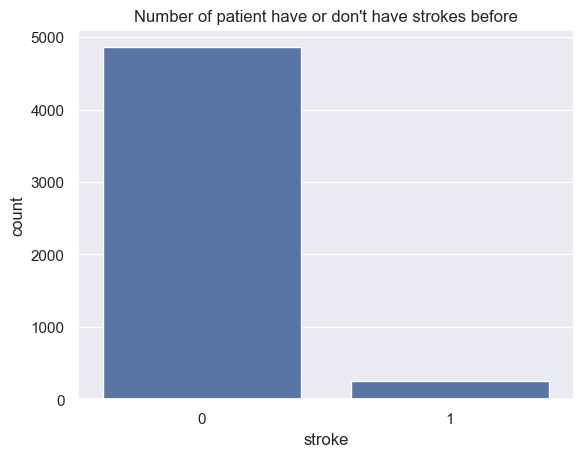

In [48]:
# Bar plot of the number of people have or don't have strokes before 
sns.countplot(x='stroke', data=health_stroke_df)
plt.title("Number of patient have or don't have strokes before")
plt.show()

In [49]:
print('Probability of a patient within the whole dataset having strokes: ')
prob_stroke_whole = health_stroke_df.stroke.mean()
print(prob_stroke_whole)

Probability of a patient within the whole dataset having strokes: 
0.0487279843444227


We can see that we have a very unbalanced class classification problem here, as >97% of the patient in the dataset do not have stroke before. For this reason, we should use confusion matrix as the metric/KPI (key performance indicator) instead of simply the accuracy here.

EDA on non-numeric feature variables

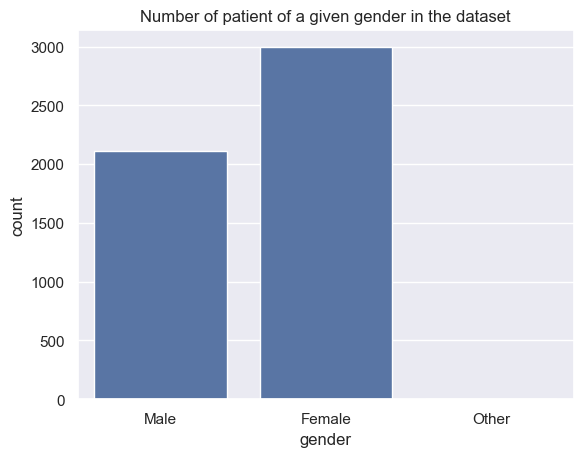

In [50]:
sns.countplot(x='gender', data=health_stroke_df)
plt.title("Number of patient of a given gender in the dataset")
plt.show()

In [51]:
# Brief examining how gender might affect a patient likely to have strokes before or not
for sex in health_stroke_df.gender.unique():
    print(f"Probability of Gender={sex} having strokes before: ")
    print(health_stroke_df[health_stroke_df.gender==sex].stroke.mean())

Probability of Gender=Male having strokes before: 
0.05106382978723404
Probability of Gender=Female having strokes before: 
0.047094188376753505
Probability of Gender=Other having strokes before: 
0.0


Compared with the case of considering all gender, where the probability of a patient within the dataset having strokes before = 0.018, we can see the gender feature alone is not very conclusive in predicting whether a patient is likely to have strokes before or not as the probabilities of cases grouped by gender are very much similar, except in the case Gender=Other (however the sample size is too small in that case).

In [52]:
# EDA on categorical variables [hypertension, heart_disease, ever_married, 
# work_type, Residence_type, smoking_status]

def get_prob_per_class_within_one_cat_feat(feature_col, df):
    """
    Function that returns the probabilities of entries of a certain class in one 
    particular feature variable having the target=1 in the dataset df (i.e. a patient 
    having strokes before in this case)

    Parameters
    ----------
    feature_col: str
        The particular feature variable of interest.
    
    df : Dataframe
        The input dataframe containing the dataset.

    Returns
    -------
    prob_per_cat_class_df: Dataframe
        A dataframe with the probabilities of entries of a certain class in one 
    particular feature variable having the target=1


    """
    prob_per_cat_class_df = pd.DataFrame(columns=[feature_col, 'sample_size', 'prob of target=1'])
    class_label_list = []
    prob_list = []
    sample_size_list = []
    for class_label in df[feature_col].dropna().unique():
        stroke_tot = df[df[feature_col]==class_label].stroke.sum()
        tot_count = df[df[feature_col]==class_label].stroke.count()
        sample_size_list.append(tot_count)
        class_label_list.append(class_label)
        prob_list.append(stroke_tot/tot_count)
    prob_per_cat_class_df[feature_col] = class_label_list
    prob_per_cat_class_df['prob of target=1'] = prob_list
    prob_per_cat_class_df['sample_size'] = sample_size_list
    return prob_per_cat_class_df

In [53]:
cat_col = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
prob_df = {}
for cat_var in cat_col:
    print(f"Categorical variable: {cat_var}")
    prob_df[cat_var] = get_prob_per_class_within_one_cat_feat(cat_var, health_stroke_df)
    print(prob_df[cat_var])
    print("-"*30, "\n")

Categorical variable: gender
   gender  sample_size  prob of target=1
0    Male         2115          0.051064
1  Female         2994          0.047094
2   Other            1          0.000000
------------------------------ 

Categorical variable: hypertension
   hypertension  sample_size  prob of target=1
0             0         4612          0.039679
1             1          498          0.132530
------------------------------ 

Categorical variable: heart_disease
   heart_disease  sample_size  prob of target=1
0              1          276          0.170290
1              0         4834          0.041787
------------------------------ 

Categorical variable: ever_married
  ever_married  sample_size  prob of target=1
0          Yes         3353          0.065613
1           No         1757          0.016505
------------------------------ 

Categorical variable: work_type
       work_type  sample_size  prob of target=1
0        Private         2925          0.050940
1  Self-employed  

In [54]:
# defining a function that returns all the related probability bar plots of patient of a certain class in each 
# particular catorgical feature variable having strokes  

def plot_prob_per_cat_class(df, health_stroke_df, fig_hsize=30, fig_wsize=30, ncols=3, nrows=3, fontsize=20):
    """
    Function that returns bar plots of the probabilities of entries of a certain class in one 
    particular feature variable having the target=1 in the dataset df (i.e. a patient 
    having strokes before in this case)

    Parameters
    ----------    
    df : Dataframe
        The input dataframe containing the probability of target=1 per category class 
        information.

    Returns
    -------
    probability plots per categorical classes

    """
    # initialising the figure plots
    i = 1
    fig = plt.figure(figsize =(fig_hsize, fig_wsize))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    for cat_var in df.keys():
        ax = fig.add_subplot(nrows, ncols, i)
        df[cat_var][['prob of target=1']].plot(kind='bar', ax=ax, fontsize=fontsize)
        plt.hlines(health_stroke_df.stroke.mean(),-1, len(df[cat_var])+.5)
        plt.annotate('prob of target=1 \n for whole dataset', xy=(0.25, 0.018), xytext=(0.05, 0.01), 
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=fontsize)
        ax.set_ylabel('Probability',fontsize=fontsize)
        ax.set_xlabel(cat_var,fontsize=fontsize)
        plt.xticks(np.arange(len(df[cat_var][cat_var])), df[cat_var][cat_var])
        i+=1
    return fig

In [56]:
def plot_num_var_KDE(df, num_var):
    """
    Function that returns kernel density estimate (KDE) plot of the given numeric variable
    for each binary target groups in the dataset df (i.e. a patient 
    having strokes before in this case)

    Parameters
    ----------    
    df : Dataframe
        The input dataframe containing the (healthcare) dataset
        
    num_var : str
        The numeric variable to be plotted

    Returns
    -------
    kernel density estimate (KDE) plot of num_var per target class

    """
    facet_plot = sns.FacetGrid(df, hue='stroke', aspect=4)
    facet_plot.map(sns.kdeplot, num_var, shade=True)
    facet_plot.set(xlim=(0, df[num_var].max()))
    facet_plot.add_legend()
    plt.title(f'KDE plot of {num_var} per strokes class labels')
    return facet_plot


def plot_num_var_vio_strip(df, num_var):
    """
    Function that returns violin and strip plots of the given numeric variable
    for each binary target groups in the dataset df (i.e. a patient 
    having strokes before in this case)

    Parameters
    ----------    
    df : Dataframe
        The input dataframe containing the (healthcare) dataset
        
    num_var : str
        The numeric variable to be plotted

    """
    fig, ax =  plt.subplots(ncols=2, sharey=True, figsize =(12,5))
    sns.violinplot(x='stroke', y=num_var, data=df, ax=ax[0])
    ax[0].set_title(f'Distribution of {num_var} per strokes class labels\n (violin plot)')
    sns.stripplot(x='stroke', y=num_var, data=df, alpha=0.2, jitter=True, ax=ax[1])
    ax[1].legend(('no stroke','stroke'))
    ax[1].set_title(f'Distribution of {num_var} per strokes class labels\n (strip plot)')

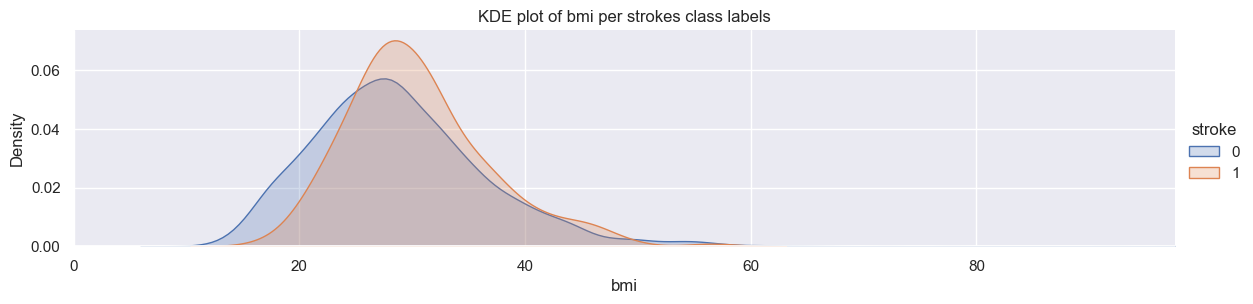

In [57]:
plot_num_var_KDE(health_stroke_df, 'bmi')

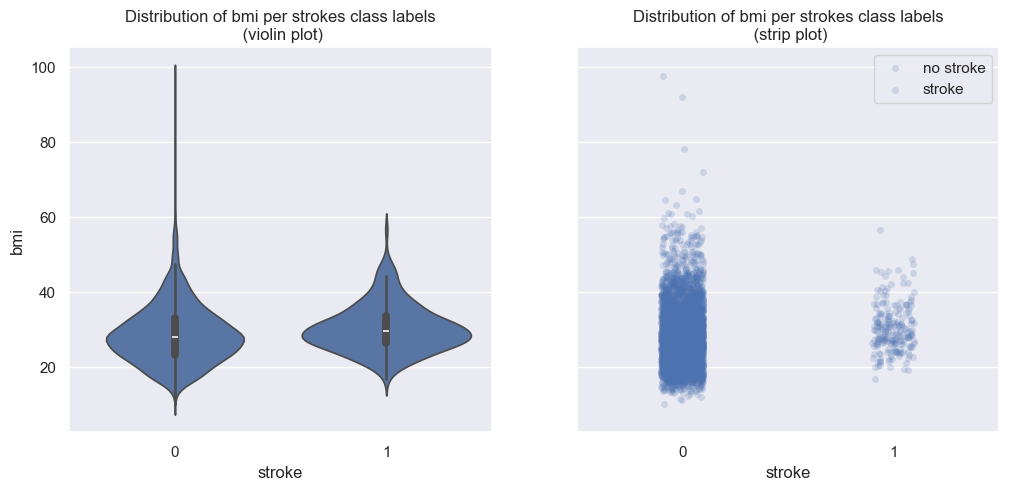

In [58]:
plot_num_var_vio_strip(health_stroke_df, 'bmi')

In [59]:
health_stroke_df.groupby('stroke').bmi.describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4700.0,28.823064,7.908287,10.3,23.4,28.0,33.1,97.6
1,209.0,30.471292,6.329452,16.9,26.4,29.7,33.7,56.6


In [60]:
#It is not very conclusive whether the feature [bmi] is predictive or not. One might need to perform some hypothesis tests (using p-value) to investigate further.

A simple example of bootstrapping and hypothesis testing

In [61]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """ 
    Function that draw bootstrap replicates.

    Parameters
    ----------    
    data : arr-like 
        The input data to be investigated and bootstrapped.
        
    func : func
        Function on the bootstrap samples to return

    Returns
    -------
    bs_replicates : 
        bootstrap replicates

    """

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [62]:
# Compute the mean of bmi
mean_bmi = np.mean(health_stroke_df.bmi)
bmi_stroke = health_stroke_df.groupby('stroke').get_group(1).bmi
bmi_no_stroke = health_stroke_df.groupby('stroke').get_group(0).bmi
empirical_diff_means = np.array([np.mean(bmi_stroke) - np.mean(bmi_no_stroke)]*4000)

# Generate shifted arrays
bmi_stroke_shifted = bmi_stroke - np.mean(bmi_stroke) + mean_bmi
bmi_no_stroke_shifted = bmi_no_stroke - np.mean(bmi_no_stroke) + mean_bmi

# Compute 4,000 bootstrap replicates from shifted arrays
bs_replicates_stroke = draw_bs_reps(bmi_stroke_shifted, np.mean, 4000)
bs_replicates_no_stroke = draw_bs_reps(bmi_no_stroke_shifted, np.mean, 4000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_stroke - bs_replicates_no_stroke

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means)/len(bs_replicates)
print('p-value =', p)

p-value = 0.0


This hypothesis testing suggests it is extremely unlikely (p-value = 0.0) that patients having stroke and that do not would have the same mean bmi given the healthcare dataset.

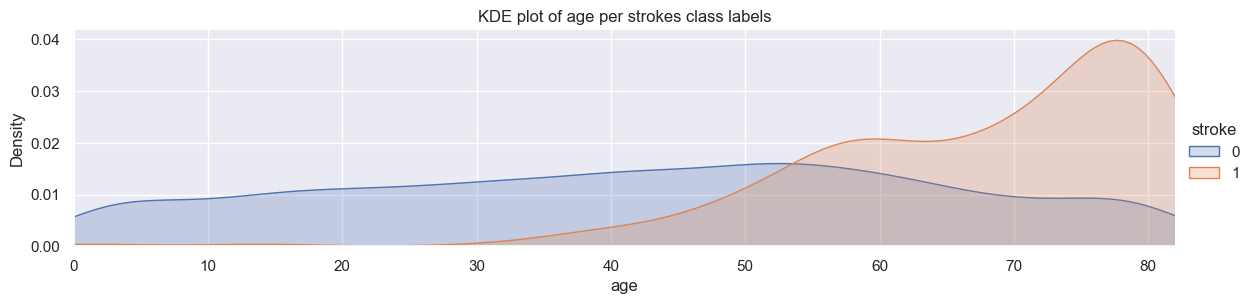

In [63]:
plot_num_var_KDE(health_stroke_df, 'age')

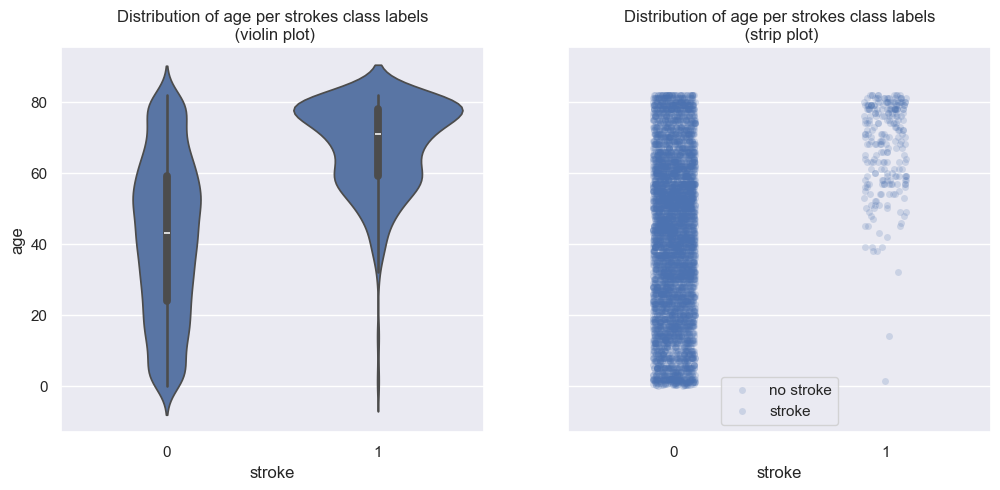

In [64]:
plot_num_var_vio_strip(health_stroke_df, 'age')

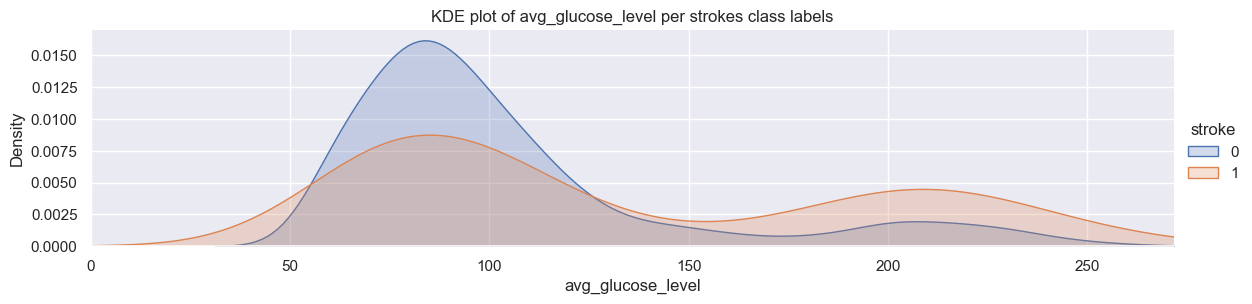

In [65]:
plot_num_var_KDE(health_stroke_df, 'avg_glucose_level')

In [66]:
health_stroke_df.groupby('stroke').avg_glucose_level.describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,104.795513,43.846069,55.12,77.12,91.47,112.83,267.76
1,249.0,132.544739,61.921056,56.11,79.79,105.22,196.71,271.74


This suggests the feature [avg_glucose_level] could be predictive.

In [67]:
# Bin the numeric variables into groups
age_bins = [0,10,20,30,40,50,60,70,80,90]
health_stroke_df['age_group'] = pd.cut(health_stroke_df.age, age_bins)
bmi_bins = [10,20,30,40,50,60,100]
health_stroke_df['bmi_group'] = pd.cut(health_stroke_df.bmi, bmi_bins)
avg_glucose_bins = [50,90,130,170,210,250,300]
health_stroke_df['avg_glucose_group'] = pd.cut(health_stroke_df.avg_glucose_level, avg_glucose_bins)

# inspecting the results
health_stroke_df.iloc[:,-3:].head()

,age_group,bmi_group,avg_glucose_group
0,"(60, 70]","(30.0, 40.0]","(210, 250]"
1,"(60, 70]",NaN,"(170, 210]"
2,"(70, 80]","(30.0, 40.0]","(90, 130]"
3,"(40, 50]","(30.0, 40.0]","(170, 210]"
4,"(70, 80]","(20.0, 30.0]","(170, 210]"


In [68]:
# Calculating the probability of having stroke per each bin within one particular numeric column
num_bin_col = ['age_group', 'bmi_group', 'avg_glucose_group']
prob_num_df = {}
for num_bin_var in num_bin_col:
    print(f"Numerical variable: {num_bin_var.split('_group')[0]}")
    prob_num_df[num_bin_var] = get_prob_per_class_within_one_cat_feat(num_bin_var, health_stroke_df)
    print(prob_num_df[num_bin_var])
    print("-"*30, "\n")

Numerical variable: age
  age_group  sample_size  prob of target=1
0  (60, 70]          594          0.082492
1  (70, 80]          594          0.176768
2  (40, 50]          739          0.020298
3  (80, 90]          116          0.198276
4  (50, 60]          823          0.059538
5  (30, 40]          674          0.008902
6   (0, 10]          507          0.001972
7  (10, 20]          518          0.001931
8  (20, 30]          545          0.000000
------------------------------ 

Numerical variable: bmi
   bmi_group  sample_size  prob of target=1
0   (30, 40]         1485          0.052525
1   (20, 30]         2479          0.044373
2   (40, 50]          329          0.051672
3   (10, 20]          537          0.005587
4   (50, 60]           66          0.015152
5  (60, 100]           13          0.000000
------------------------------ 

Numerical variable: avg_glucose
  avg_glucose_group  sample_size  prob of target=1
0        (210, 250]          288          0.135417
1        (170,

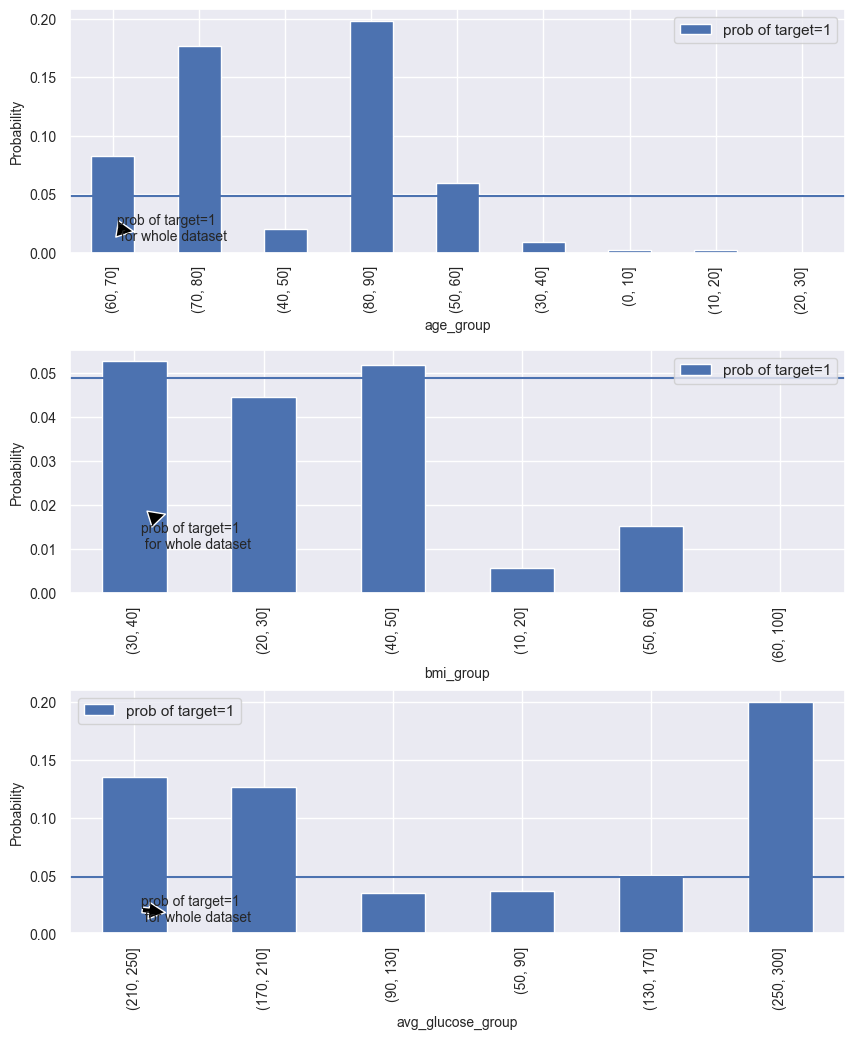

In [69]:
figure_EDA_num_var = plot_prob_per_cat_class(prob_num_df, health_stroke_df, 10,12, ncols=1, nrows=3, fontsize=10)

Correlation study

In [70]:
health_stroke_cat_numeric_df = health_stroke_df.iloc[:,:-3].copy()
health_stroke_cat_numeric_df.drop(columns=['id'], inplace=True)

# convert the categorical variables to categorical type
# (for efficient reason)
cat_col = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
health_stroke_cat_numeric_df[cat_col] = health_stroke_cat_numeric_df[cat_col].astype('category')
health_stroke_cat_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   int64   
 3   heart_disease      5110 non-null   int64   
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 265.4 KB


correlation, categorical variable

In [72]:
# Creating a copy of the health stroke dataframe and imputing the missing values
# in ['bmi', 'smoking_status'] for calculating the correlation coefficient
# (Imputation methods will be explained in more detail in the next section)
health_stroke_df2 = health_stroke_df.iloc[:,:-3].copy()

# using median for impute bmi missing
health_stroke_df2.bmi.fillna(health_stroke_df2.bmi.median(), inplace=True)
# using a new label 'no_info' for impute smoking_status missing
health_stroke_df2.smoking_status.fillna('no info', inplace=True)

In [73]:
# Label encoding

nom_col = ['gender', 'ever_married', 'work_type', 'Residence_type']
ord_col = ['smoking_status']

health_stroke_df2 = pd.get_dummies(health_stroke_df2, columns = nom_col)

ord_var_code = 'smoking_status_code'
smoke_mapper = {'never smoked': 0, 'no info': 1,
                'formerly smoked': 2,'smokes':3}
health_stroke_df2[ord_var_code] = health_stroke_df2['smoking_status'].map(smoke_mapper)

Preprocessing


In [76]:
health_stroke_without_NAN_df = health_stroke_df.iloc[:,:-3].copy().dropna()
# preview the resulting df basic info 
health_stroke_without_NAN_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [77]:
#bmi: using median
#smoking_status: using mode

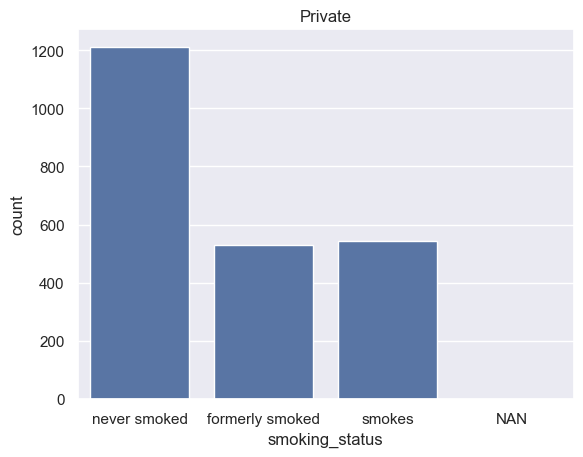

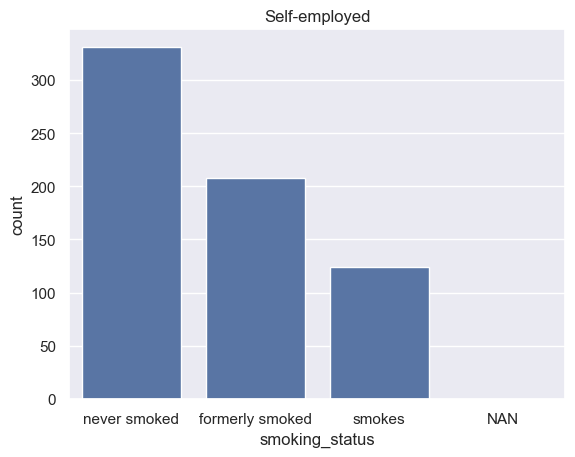

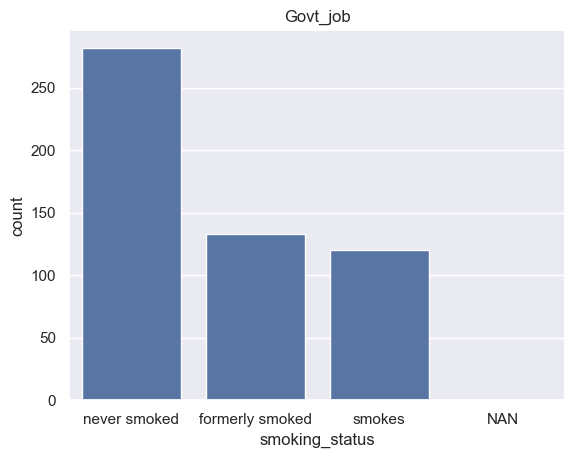

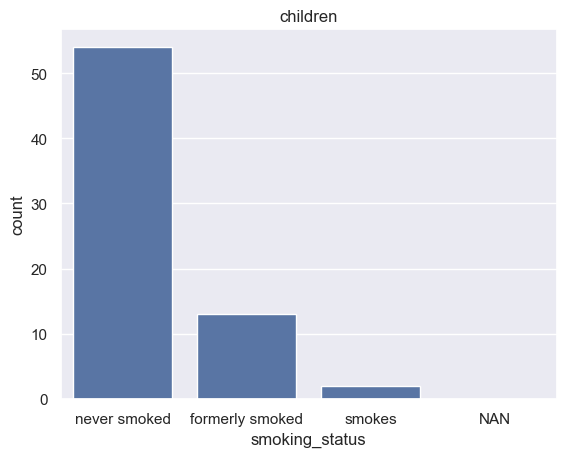

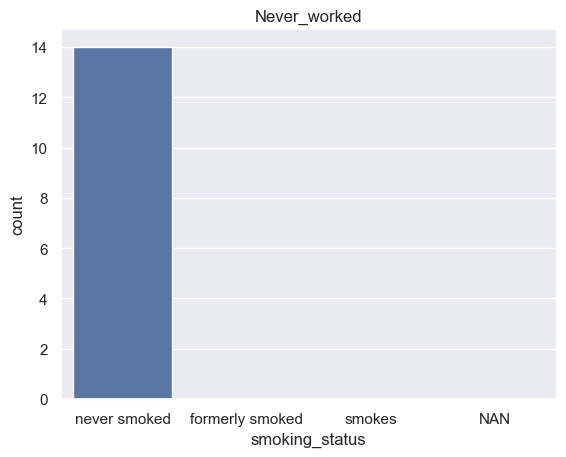

In [78]:
health_stroke_df_temp = health_stroke_df.copy()
health_stroke_df_temp.smoking_status.fillna('NAN', inplace=True)

for work in health_stroke_df_temp.work_type.unique(): 
    sns.countplot(x='smoking_status', data=health_stroke_df_temp.groupby('work_type').get_group(work), 
                  order=['never smoked', 'formerly smoked', 'smokes', 'NAN'])
    plt.title(work)
    plt.show()

In [79]:
# Preview again the encoded df
health_stroke_df2.head()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,...,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_code
0,9046,67.0,0,1,228.69,36.6,formerly smoked,1,False,True,...,False,True,False,False,True,False,False,False,True,2.0
1,51676,61.0,0,0,202.21,28.1,never smoked,1,True,False,...,False,True,False,False,False,True,False,True,False,0.0
2,31112,80.0,0,1,105.92,32.5,never smoked,1,False,True,...,False,True,False,False,True,False,False,True,False,0.0
3,60182,49.0,0,0,171.23,34.4,smokes,1,True,False,...,False,True,False,False,True,False,False,False,True,3.0
4,1665,79.0,1,0,174.12,24.0,never smoked,1,True,False,...,False,True,False,False,False,True,False,True,False,0.0


In [80]:
health_stroke_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5110 non-null   int64  
 1   age                      5110 non-null   float64
 2   hypertension             5110 non-null   int64  
 3   heart_disease            5110 non-null   int64  
 4   avg_glucose_level        5110 non-null   float64
 5   bmi                      5110 non-null   float64
 6   smoking_status           5110 non-null   object 
 7   stroke                   5110 non-null   int64  
 8   gender_Female            5110 non-null   bool   
 9   gender_Male              5110 non-null   bool   
 10  gender_Other             5110 non-null   bool   
 11  ever_married_No          5110 non-null   bool   
 12  ever_married_Yes         5110 non-null   bool   
 13  work_type_Govt_job       5110 non-null   bool   
 14  work_type_Never_worked  

In [81]:
# dropping the id and information duplicating columns
health_stroke_df_ML = health_stroke_df2.drop(columns=['id', 'gender_Other', 'ever_married_No', 'Residence_type_Rural',
                                                      'work_type_Never_worked', 'smoking_status'])
health_stroke_df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5110 non-null   float64
 1   hypertension             5110 non-null   int64  
 2   heart_disease            5110 non-null   int64  
 3   avg_glucose_level        5110 non-null   float64
 4   bmi                      5110 non-null   float64
 5   stroke                   5110 non-null   int64  
 6   gender_Female            5110 non-null   bool   
 7   gender_Male              5110 non-null   bool   
 8   ever_married_Yes         5110 non-null   bool   
 9   work_type_Govt_job       5110 non-null   bool   
 10  work_type_Private        5110 non-null   bool   
 11  work_type_Self-employed  5110 non-null   bool   
 12  work_type_children       5110 non-null   bool   
 13  Residence_type_Urban     5110 non-null   bool   
 14  smoking_status_code     

In [82]:
numeric_col = ['age', 'avg_glucose_level', 'bmi']
health_stroke_df_ML_non_stand = health_stroke_df_ML.copy()
health_stroke_df_ML[numeric_col].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.862035
std,22.612647,45.283560,7.699562
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


Standardise / Normalise

In [83]:
min_max_scaler = MinMaxScaler()
health_stroke_df_ML[numeric_col] = min_max_scaler.fit_transform(health_stroke_df_ML[numeric_col])

In [84]:
health_stroke_df_ML[numeric_col].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,0.526692,0.235563,0.212624
std,0.276033,0.209046,0.088197
min,0.000000,0.000000,0.000000
25%,0.304199,0.102137,0.154639
50%,0.548340,0.169721,0.203895
75%,0.743652,0.272228,0.257732
max,1.000000,1.000000,1.000000


Modelling

In [85]:
# identifying the feature and target columns
feature_col = health_stroke_df_ML.drop(columns=['stroke']).columns
target_var = 'stroke'

In [86]:
# List of Machine Learning classification models considered
# (with default hyperparameters)
MLA_classifier = [
    # Decision Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    # Linear Model
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),
    
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    # xgboost: https://xgboost.readthedocs.io/en/latest/
    XGBClassifier()    
    ]

In [88]:
def metric_score_per_ML_clf(X, y, clf, cv_split, score_method):
    """
    Function that returns the detailed metric score information for each ML classifier inputed.

    Parameters
    ----------    
    X : Dataframe
        DataFrame containing the feature variables.
        
    y : arr-like or pd.Series
        The target variable
        
    clf : arr-like
        List of Machine Learning classification models to run
        
    cv_split : sklearn.model_selection._split
        How to split the dataset to perform cross validation
        
    score_method : str
        A single string (see The scoring parameter: defining model evaluation rules) 
        or a callable (see Defining your scoring strategy from metric functions) to 
        evaluate the predictions on the test set.

    Returns
    -------
    metric_score_df : DataFrame
        Dataframe containing the detailed metric score information for each 
        ML classifier.

    """
    # create df to compare different machine learning classifiers (using f1 score)
    MLA_columns = ['ML_classifier_name', 'ML_parameters','train_score_mean', 'test_score_mean', 
               'test_score_3*std', 'test_score_min', 'mean_running_time']
    metric_score_df = pd.DataFrame(columns = MLA_columns)

    #index through MLA and save performance to table
    row_index = 0
    
    for alg in clf:
    
        # set name and parameters
        MLA_name = alg.__class__.__name__
        metric_score_df.loc[row_index, 'ML_classifier_name'] = MLA_name
        metric_score_df.loc[row_index, 'ML_parameters'] = str(alg.get_params())
    
        # score model with cross validation
        cv_results = cross_validate(alg, X, y, scoring=score_method, cv = cv_split)

        metric_score_df.loc[row_index, 'mean_running_time'] = cv_results['fit_time'].mean()
        metric_score_df.loc[row_index, 'train_score_mean'] = cv_results['train_score'].mean()
        metric_score_df.loc[row_index, 'test_score_mean'] = cv_results['test_score'].mean()   
        metric_score_df.loc[row_index, 'test_score_min'] = cv_results['test_score'].min()   
        # Compute the spread of the test_f1_score
        metric_score_df.loc[row_index, 'test_score_3*std'] = cv_results['test_score'].std()*3  
    
        row_index+=1
    
    # print and sort table
    metric_score_df.sort_values(by = ['test_score_mean'], ascending = False, inplace = True)
    return metric_score_df

plotting feature importance (using Decision Tree Classifier)

In [91]:
# Function for plotting (and displaying) the feature importances 
# of a given sklearn estimator 
# --------------------------------------
# Adopted from web: Author, George Fisher

def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_train and y_train are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    Author
    ------
        George Fisher
    '''
    
    __name__ = "plot_feature_importances"
    
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except (XGBoostError, LightGBMError, ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize, legend=False)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

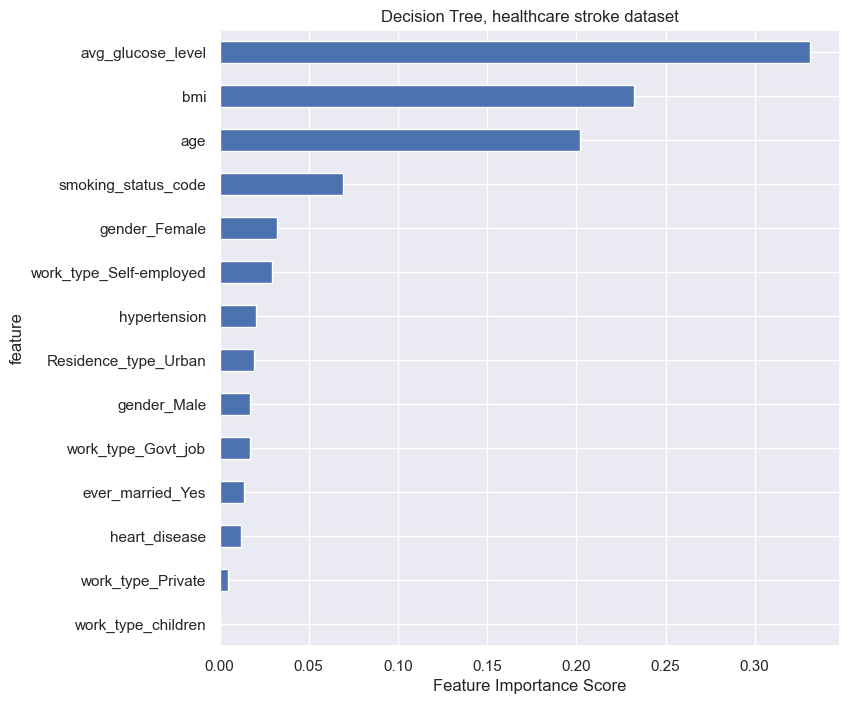

In [92]:
# Plot feature importances for each household (using decision tree classifier)

try:
    _ = plot_feature_importances( tree.DecisionTreeClassifier(), X, y, top_n=X.shape[1],  
                                 title='Decision Tree, healthcare stroke dataset')
except AttributeError as e:
    print(e) 

Model evaluation

To evaluate our ML model performance, we would need to compare the model with some other benchmark models. The benchmark models for comparison here are:

random guessing

all not strokes

In [99]:
import random

# Add the column first to avoid assignment errors
health_stroke_df_ML_final['random_pred'] = 0  

for index, row in health_stroke_df_ML_final.iterrows(): 
    if random.random() > 0.5:
        health_stroke_df_ML_final.at[index, 'random_pred'] = 1  # predict stroke
    else:
        health_stroke_df_ML_final.at[index, 'random_pred'] = 0  # predict no stroke


In [95]:
print(health_stroke_df_ML)

           age  hypertension  heart_disease  avg_glucose_level       bmi  \
0     0.816895             0              1           0.801265  0.301260   
1     0.743652             0              0           0.679023  0.203895   
2     0.975586             0              1           0.234512  0.254296   
3     0.597168             0              0           0.536008  0.276060   
4     0.963379             1              0           0.549349  0.156930   
...        ...           ...            ...                ...       ...   
5105  0.975586             1              0           0.132167  0.203895   
5106  0.987793             0              0           0.323516  0.340206   
5107  0.426270             0              0           0.128658  0.232532   
5108  0.621582             0              0           0.513203  0.175258   
5109  0.536133             0              0           0.139230  0.182131   

      stroke  gender_Female  gender_Male  ever_married_Yes  \
0          1          Fal

In [100]:
print('Random guessing, f1 score: {:.2f}'.format(metrics.f1_score(health_stroke_df_ML_final['stroke'], 
                                                                  health_stroke_df_ML_final['random_pred'])))
print('Random guessing, roc_auc score: {:.2f}'.format(metrics.roc_auc_score(health_stroke_df_ML_final['stroke'], 
                                                                  health_stroke_df_ML_final['random_pred'])))
print('Random guessing, accuracy score: {:.2f}'.format(metrics.accuracy_score(health_stroke_df_ML_final['stroke'], 
                                                                  health_stroke_df_ML_final['random_pred'])))

Random guessing, f1 score: 0.08
Random guessing, roc_auc score: 0.48
Random guessing, accuracy score: 0.49


In [101]:
# 2) all not stroke

health_stroke_df_ML_final['all_not_stroke'] = 0 
print('all not stroke, f1 score: {:.2f}'.format(metrics.f1_score(health_stroke_df_ML_final['stroke'], 
                                                                  health_stroke_df_ML_final['all_not_stroke'])))
print('all not stroke, roc_auc score: {:.2f}'.format(metrics.roc_auc_score(health_stroke_df_ML_final['stroke'], 
                                                                  health_stroke_df_ML_final['all_not_stroke'])))
print('all not stroke, accuracy score: {:.2f}'.format(metrics.accuracy_score(health_stroke_df_ML_final['stroke'], 
                                                                  health_stroke_df_ML_final['all_not_stroke'])))

all not stroke, f1 score: 0.00
all not stroke, roc_auc score: 0.50
all not stroke, accuracy score: 0.95


In [103]:
X = X.dropna()
y = y.loc[X.index]  # Make sure y matches the new X

# Proceed as usual
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.4, random_state=0)
GNB = naive_bayes.GaussianNB()
GNB.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [105]:
# Predict on the full dataset used for training
X_imputed = X.copy()  # if X has NaNs, you should impute as shown before

# Predict
predictions = GNB.predict(X_imputed)

# Add a new column only to the subset used in X
health_stroke_df_ML_final_subset = health_stroke_df_ML_final.loc[X.index]
health_stroke_df_ML_final_subset['GNB_pred'] = predictions


In [106]:
health_stroke_df_ML_final.loc[X.index, 'GNB_pred'] = predictions


In [107]:
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

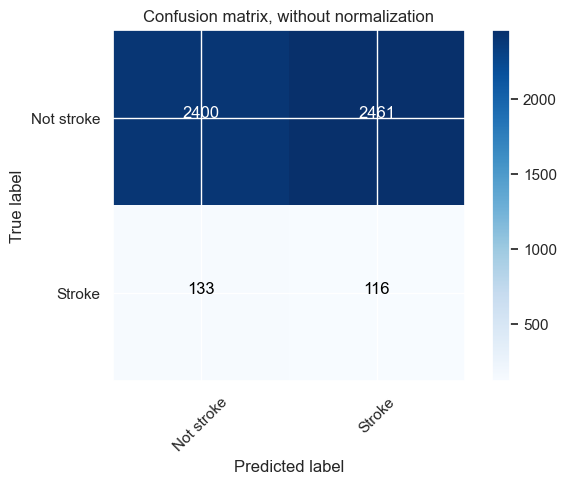

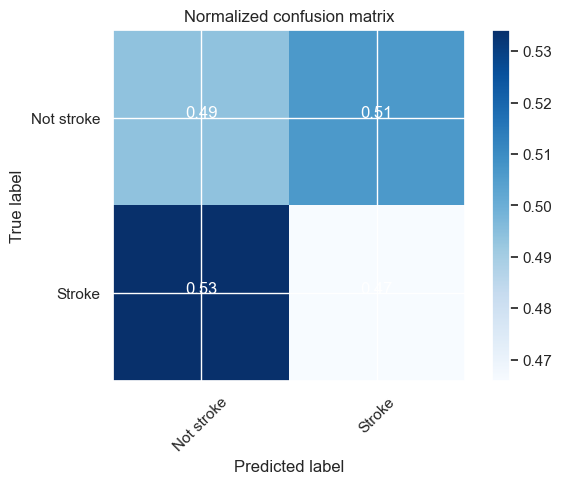

In [108]:
cnf_matrix = metrics.confusion_matrix(health_stroke_df_ML_final['stroke'], health_stroke_df_ML_final['random_pred'])
np.set_printoptions(precision=2)

class_names = ['Not stroke', 'Stroke']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, 
                      title='Normalized confusion matrix')

Hyperparameter tuning and feature selection

In [109]:
#To improve our ML model, we would then performing hyperparameter tuning and feature selection. For Gaussian Naive Bayes, there is really only one hyperparameter to be tuned, which is var_smoothing.

In [111]:
# base model
GNB_base = naive_bayes.GaussianNB()
base_results = cross_validate(GNB_base, X, y, scoring='f1', cv=cv_split, return_train_score=True)
GNB_base.fit(X, y)

print('BEFORE Naive Bayes parameters: ', GNB_base.get_params())
print("BEFORE Naive Bayes Training f1 score mean: {:.2f}".format(base_results['train_score'].mean())) 
print("BEFORE Naive Bayes Test f1 score mean: {:.2f}".format(base_results['test_score'].mean()))
print("BEFORE Naive Bayes Test f1 score 3*std: +/- {:.2f}".format(base_results['test_score'].std()*3))
print('-'*10)


BEFORE Naive Bayes parameters:  {'priors': None, 'var_smoothing': 1e-09}
BEFORE Naive Bayes Training f1 score mean: 0.14
BEFORE Naive Bayes Test f1 score mean: 0.15
BEFORE Naive Bayes Test f1 score 3*std: +/- 0.03
----------


Feature Selection

In [114]:
sfe_results = cross_validate(GNB_base, X[sel_feature], y, scoring='f1', cv=cv_split, return_train_score=True)


Final Naive Bayes model

In [121]:
health_stroke_df_ML_final = health_stroke_df_ML.copy()

# Final ML model using Gaussian Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X[sel_feature], y, train_size=0.6, random_state=42)
GNB_final = naive_bayes.GaussianNB(var_smoothing=0.001)
GNB_final.fit(X_train, y_train)

# Only assign predictions to rows present in X
health_stroke_df_ML_final.loc[X.index, 'GNB_pred'] = GNB_final.predict(X[sel_feature])

# Evaluation
print('Gaussian Naive Bayes, f1 score: {:.2f}'.format(metrics.f1_score(
    health_stroke_df_ML_final.loc[X.index, 'stroke'], 
    health_stroke_df_ML_final.loc[X.index, 'GNB_pred'])))

print('Gaussian Naive Bayes, roc_auc score: {:.2f}'.format(metrics.roc_auc_score(
    health_stroke_df_ML_final.loc[X.index, 'stroke'], 
    health_stroke_df_ML_final.loc[X.index, 'GNB_pred'])))

print('Gaussian Naive Bayes, accuracy score: {:.2f}'.format(metrics.accuracy_score(
    health_stroke_df_ML_final.loc[X.index, 'stroke'], 
    health_stroke_df_ML_final.loc[X.index, 'GNB_pred'])))


Gaussian Naive Bayes, f1 score: 0.23
Gaussian Naive Bayes, roc_auc score: 0.62
Gaussian Naive Bayes, accuracy score: 0.88


In [123]:
# Label encoding for the without imputation df (droping missing values)

nom_col = ['gender', 'ever_married', 'work_type', 'Residence_type']
ord_col = ['smoking_status']

health_stroke_without_NAN_df = pd.get_dummies(health_stroke_without_NAN_df, columns = nom_col)

ord_var_code = 'smoking_status_code'
smoke_mapper = {'never smoked': 0, 'formerly smoked': 1,'smokes':2}
health_stroke_without_NAN_df[ord_var_code] = health_stroke_without_NAN_df['smoking_status'].map(smoke_mapper)

min_max_scaler = MinMaxScaler()
health_stroke_without_NAN_df[numeric_col] = min_max_scaler.fit_transform(health_stroke_without_NAN_df[numeric_col])

health_stroke_without_NAN_df = health_stroke_without_NAN_df.drop(columns=['id', 'gender_Other', 'ever_married_No', 
                                                                          'Residence_type_Rural',
                                                                          'work_type_Never_worked', 
                                                                          'smoking_status'])

In [124]:
# Inspect basic info after label encoding
health_stroke_without_NAN_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      4909 non-null   float64
 1   hypertension             4909 non-null   int64  
 2   heart_disease            4909 non-null   int64  
 3   avg_glucose_level        4909 non-null   float64
 4   bmi                      4909 non-null   float64
 5   stroke                   4909 non-null   int64  
 6   gender_Female            4909 non-null   bool   
 7   gender_Male              4909 non-null   bool   
 8   ever_married_Yes         4909 non-null   bool   
 9   work_type_Govt_job       4909 non-null   bool   
 10  work_type_Private        4909 non-null   bool   
 11  work_type_Self-employed  4909 non-null   bool   
 12  work_type_children       4909 non-null   bool   
 13  Residence_type_Urban     4909 non-null   bool   
 14  smoking_status_code      3426